# Read LGMR SIC data
Ref: New data from M. Osman

In [2]:
path='D:/VScode/Last_deglaciation/data/LGMR_SIC_May2023.nc'

# read the nc file from the path
import xarray as xr
import numpy as np

ds_seaice = xr.open_dataset(path)
ds_seaice = ds_seaice.where(ds_seaice.age>=10000, drop=True)

# Calculate the weight based on latitude
weight = np.cos(np.deg2rad(ds_seaice['lat']))
print('shape of the weight:', weight.shape)

weight = xr.where(weight < 0, 0, weight)

ds_seaice['weight'] = weight


ds_seaice.info()

shape of the weight: (96,)
xarray.Dataset {
dimensions:
	dims = 5 ;
	age = 70 ;
	lat = 96 ;
	lon = 144 ;

variables:
	float32 sic(dims, age, lat, lon) ;
		sic:FillValue = 9.969209968386869e+36 ;
		sic:long_name = Mean annual sea ice concentration ;
		sic:units = Fraction cover ;
	float32 lat(lat) ;
	float32 lon(lon) ;
		lon:FillValue = 9.969209968386869e+36 ;
		lon:long_name = vector of longitudes ;
		lon:units = degrees_east ;
	float32 age(age) ;
		age:long_name = reconstruction bin mid-point (years BP) ;
	object dims(dims) ;
		dims:long_name = dimensions (mean--median--1sigma--2.5--97.5) ;
	float32 weight(lat) ;

// global attributes:
}

c:\Users\zps19\.conda\envs\pz-env\lib\site-packages\xarray\coding\variables.py:148: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
c:\Users\zps19\.conda\envs\pz-env\lib\site-packages\xarray\coding\variables.py:148: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv


In [2]:
ds_seaice

<xarray.Dataset>
Dimensions:  (dims: 5, age: 70, lat: 96, lon: 144)
Coordinates:
  * lat      (lat) float32 -90.0 -88.11 -86.21 -84.32 ... 84.32 86.21 88.11 90.0
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * age      (age) float32 1.01e+04 1.03e+04 1.05e+04 ... 2.37e+04 2.39e+04
  * dims     (dims) object 'mean              ' ... '97.5percentile    '
Data variables:
    sic      (dims, age, lat, lon) float32 0.0 0.0 0.0 ... 0.9979 0.9979 0.9979
    weight   (lat) float32 0.0 0.03306 0.06609 0.09905 ... 0.06609 0.03306 0.0

<xarray.DataArray 'sic' (age: 70)>
array([0.03047727, 0.03844845, 0.04613154, 0.04513324, 0.04315239,
       0.04485562, 0.04310745, 0.03444032, 0.03997872, 0.04145298,
       0.03715025, 0.03669351, 0.02993525, 0.02699024, 0.02455097,
       0.0190809 , 0.01435855, 0.01681036, 0.02446057, 0.02326961,
       0.02818621, 0.02658495, 0.02887482, 0.02985411, 0.0318117 ,
       0.02490248, 0.02361593, 0.02340428, 0.02585787, 0.02494758,
       0.02284373, 0.02361466, 0.02009743, 0.01851074, 0.01914346,
       0.01131378, 0.01031322, 0.0117537 , 0.01212661, 0.00946528,
       0.01331972, 0.00850298, 0.00890946, 0.00942141, 0.00836205,
       0.00914882, 0.00915719, 0.00897372, 0.00900062, 0.0077414 ,
       0.00950972, 0.00693309, 0.00848088, 0.00625881, 0.00629518,
       0.00635432, 0.00613309, 0.00625831, 0.00716254, 0.00619105,
       0.00499574, 0.00541844, 0.00653135, 0.00705309, 0.00685836,
       0.00590578, 0.00676887, 0.005043  , 0.0094925 , 0.00914564],
      dtype=float32)
Coordinates:
    lat      float32 -67.26
    lon      float32 0.0
  * age      (age) float32 1.01e+04 1.03e+04 1.05e+04 ... 2.37e+04 2.39e+04
    dims     <U18 'standard_deviation'
Attributes:
    FillValue:  9.969209968386869e+36
    long_name:  Mean annual sea ice concentration
    units:      Fraction cover

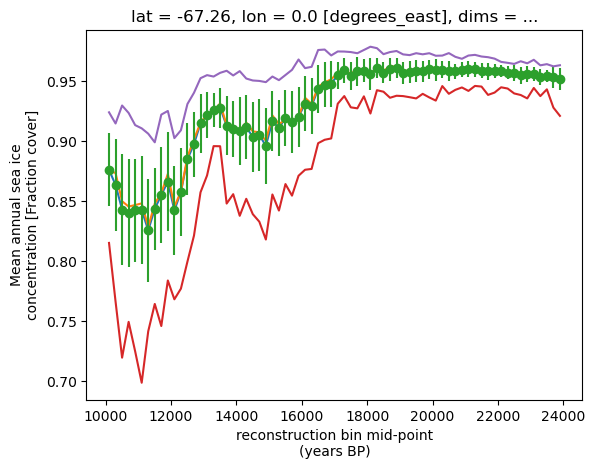

In [20]:
ds_seaice['sic'].isel(dims=0).isel(lat=12).isel(lon=0).plot()
ds_seaice['sic'].isel(dims=1).isel(lat=12).isel(lon=0).plot()
# plot dims==2 as the error of the dims==0
import matplotlib.pyplot as plt
plt.errorbar(ds_seaice['age'], ds_seaice['sic'].isel(dims=0).isel(lat=12).isel(lon=0), yerr=ds_seaice['sic'].isel(dims=2).isel(lat=12).isel(lon=0), fmt='o')
ds_seaice['sic'].isel(dims=3).isel(lat=12).isel(lon=0).plot()
ds_seaice['sic'].isel(dims=4).isel(lat=12).isel(lon=0).plot()

ds_seaice['sic'].isel(dims=2).isel(lat=12).isel(lon=0)

# Clculate the sea ice area of the LGMR, with uncertainty, using MC

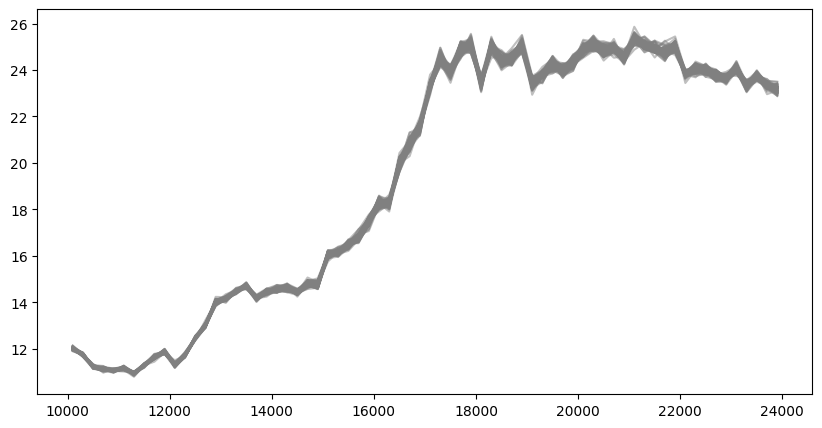

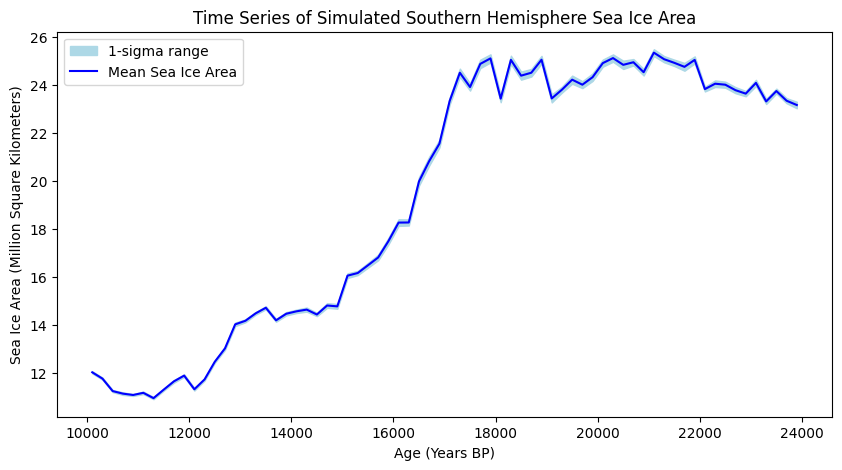

Mean SH Sea Ice Area at the last time point: 23.17 million square kilometers
1-sigma Standard Deviation at the last time point: 0.14 million square kilometers


In [3]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

# Constants
R = 6371  # Earth's radius in km
delta_theta = 2.5 / 180 * np.pi  # 2.5 degree in radians

# Load and preprocess data (assuming ds_seaice is already loaded)
ds_seaice_subset = ds_seaice.sel(lat=slice(-90, 0))
lat_radians = np.radians(ds_seaice_subset['lat'].values)

# Compute latitudinal boundaries and area of each grid cell
lat_boundaries = (lat_radians[:-1] + lat_radians[1:]) / 2
A = R**2 * delta_theta * (np.sin(lat_boundaries[1:]) - np.sin(lat_boundaries[:-1]))
A_center_lats = ds_seaice_subset['lat'].values[1:-1]
ds_seaice_subset_reduced = ds_seaice_subset.isel(lat=slice(1, -1))
A_xr = xr.DataArray(A, dims=["lat"], coords={"lat": A_center_lats})

# Expand A_xr to include 'age' and 'lon' dimensions
A_xr_expanded = A_xr.expand_dims({'age': ds_seaice_subset_reduced['age'], 'lon': ds_seaice_subset_reduced['lon']}, (-3, -1))

# Monte Carlo simulation setup
n_iterations = 100
age_count = len(ds_seaice_subset_reduced['age'])
sea_ice_areas = np.zeros((n_iterations, age_count))  # Store time series for each iteration


plt.figure(figsize=(10, 5))

for i in range(n_iterations):
    # Sample sic values
    sic_mean = ds_seaice_subset_reduced['sic'][0, :, :, :]  # Mean sic
    sic_std = ds_seaice_subset_reduced['sic'][2, :, :, :]   # Standard deviation of sic
    sic_sampled = np.random.normal(sic_mean, sic_std)


    # Calculate sea ice area for this iteration
    sic_area = sic_sampled * A_xr_expanded  # Now dimensions should match
    total_area = sic_area.sum(dim=["lat", "lon"]).values / 1e6  # Convert to millions of square kilometers
    sea_ice_areas[i, :] = total_area
    if i<=100:
        plt.plot(ds_seaice_subset_reduced['age'], total_area, color='gray', alpha=0.5)

# Calculate mean and standard deviation along the iterations
mean_area = np.mean(sea_ice_areas, axis=0)
std_dev_area = np.std(sea_ice_areas, axis=0)

# Plotting the results
plt.figure(figsize=(10, 5))
plt.fill_between(ds_seaice_subset_reduced['age'], mean_area - std_dev_area, mean_area + std_dev_area, color='lightblue', label='1-sigma range')
plt.plot(ds_seaice_subset_reduced['age'], mean_area, label='Mean Sea Ice Area', color='blue')
# plot the interquartile range of the mean_area
# plt.fill_between(ds_seaice_subset_reduced['age'], np.percentile(sea_ice_areas, 25, axis=0), np.percentile(sea_ice_areas, 75, axis=0), color='lightgreen', label='Interquartile range')
plt.title('Time Series of Simulated Southern Hemisphere Sea Ice Area')
plt.xlabel('Age (Years BP)')
plt.ylabel('Sea Ice Area (Million Square Kilometers)')
plt.legend()
plt.show()

# Print mean and 1-sigma standard deviation at a specific time point if needed
# Example for the last time point:
print(f"Mean SH Sea Ice Area at the last time point: {mean_area[-1]:.2f} million square kilometers")
print(f"1-sigma Standard Deviation at the last time point: {std_dev_area[-1]:.2f} million square kilometers")


In [3]:
# import xarray as xr
# import numpy as np
# import matplotlib.pyplot as plt

# # Constants
# R = 6371  # Earth's radius in km
# delta_theta = 2.5 / 180 * np.pi  # 2.5 degree in radians

# # Load and preprocess data (assuming ds_seaice is already loaded)
# ds_seaice_subset = ds_seaice.sel(lat=slice(-90, 0))
# lat_radians = np.radians(ds_seaice_subset['lat'].values)

# # Compute latitudinal boundaries and area of each grid cell
# lat_boundaries = (lat_radians[:-1] + lat_radians[1:]) / 2
# A = R**2 * delta_theta * (np.sin(lat_boundaries[1:]) - np.sin(lat_boundaries[:-1]))
# A_center_lats = ds_seaice_subset['lat'].values[1:-1]
# ds_seaice_subset_reduced = ds_seaice_subset.isel(lat=slice(1, -1))
# A_xr = xr.DataArray(A, dims=["lat"], coords={"lat": A_center_lats})

# # Monte Carlo simulation setup
# n_iterations = 1000
# sea_ice_areas = np.zeros(n_iterations)

# for i in range(n_iterations):
#     # Sample sic values
#     sic_mean = ds_seaice_subset_reduced['sic'][0, :, :].values  # Mean sic
#     sic_std = ds_seaice_subset_reduced['sic'][2, :, :].values   # Standard deviation of sic
#     sic_sampled = np.random.normal(sic_mean, sic_std)

#     # Calculate sea ice area for this iteration
#     sic_area = sic_sampled * A_xr
#     total_area = sic_area.sum().values / 1e6  # Convert to millions of square kilometers
#     sea_ice_areas[i] = total_area

# # Calculate mean and standard deviation
# mean_area = np.mean(sea_ice_areas)
# std_dev_area = np.std(sea_ice_areas)

# # Plotting the results
# plt.hist(sea_ice_areas, bins=30, alpha=0.7)
# plt.title('Distribution of Simulated Southern Hemisphere Sea Ice Area')
# plt.xlabel('Sea Ice Area (Million Square Kilometers)')
# plt.ylabel('Frequency')
# plt.axvline(mean_area, color='red', linestyle='dashed', linewidth=1)
# plt.show()

# # Print mean and 1-sigma standard deviation
# print(f"Mean SH Sea Ice Area: {mean_area:.2f} million square kilometers")
# print(f"1-sigma Standard Deviation: {std_dev_area:.2f} million square kilometers")


ValueError: operands could not be broadcast together with shapes (70,46,144) (46,) 

# Clculate the sea ice area of the LGMR

In [4]:
import xarray as xr


ds_seaice_subset = ds_seaice.sel(lat=slice(-90, 0))


import numpy as np

# Constants
R = 6371  # Earth's radius in km
delta_theta= 2.5/180*np.pi # 2.5 degree in radians

# Convert latitude values to radians
lat_radians = np.radians(ds_seaice_subset['lat'].values)
print('shape of lat_radians:', lat_radians.shape)
# Compute latitudinal boundaries
lat_boundaries = (lat_radians[:-1] + lat_radians[1:]) / 2
print('shape of lat_boundaries:', lat_boundaries.shape)

A=R**2*delta_theta*(np.sin(lat_boundaries[1:])-np.sin(lat_boundaries[:-1]))# area of each grid, Ref: https://www.johndcook.com/blog/2023/02/21/sphere-grid-area/#:~:text=Area%20of%20latitude%2Flongitude%20grid&text=A%20%3D%20%CF%80%20R%C2%B2%20(sin%20%CF%86,1%20%E2%88%92%20%CE%B82)%2F180.
print('shape of A:', A.shape)

A_center_lats=ds_seaice_subset['lat'].values[1:-1]
print('shape of A_center_lats:', A_center_lats.shape)

# remove the data corresponds to the last and firs lat in ds_seaice_subset
ds_seaice_subset_reduced=ds_seaice_subset.isel(lat=slice(1,-1))


# Step 1: Create an xarray DataArray for A with the dimension 'lat' and values of 'A_center_lats'
A_xr = xr.DataArray(A, dims=["lat"], coords={"lat": A_center_lats})

# Step 2: Multiply sic data at dim=0 with A
# Selecting the mean sea ice concentration (sic at dim=0)
sic = ds_seaice_subset_reduced['sic'][0, :, :]


# Multiplying sic with A
sic_area = sic * A_xr

# Step 3: Sum up the resulting product over the latitude (and longitude, if needed)
LGMR_sic_area = sic_area.sum(dim=["lat", "lon"]).values/1e6

# add age to LGMR_sic_area so it got two columns
LGMR_sic_area=np.column_stack((ds_seaice_subset_reduced['age'].values,LGMR_sic_area))



sic_std = ds_seaice_subset_reduced['sic'][2, :, :]

sic_std_area = sic_std * A_xr
sic_variance_area = sic_std_area ** 2
total_variance = sic_variance_area.sum(dim=["lat", "lon"])
total_std_dev = np.sqrt(total_variance).values / 1e6  # Convert as needed

# Combine with ages for final output if necessary
LGMR_sic_std = np.column_stack((ds_seaice_subset_reduced['age'].values, total_std_dev))


# save the LGMR_sic_area using pickle
import pickle
with open('D:/VScode/Last_deglaciation/data_fig3/LGMR_sic_area.pickle', 'wb') as f:
    pickle.dump(LGMR_sic_area, f)

# save the LGMR_sic_std using pickle
with open('D:/VScode/Last_deglaciation/data_fig3/LGMR_sic_std.pickle', 'wb') as f:
    pickle.dump(LGMR_sic_std, f)


shape of lat_radians: (48,)
shape of lat_boundaries: (47,)
shape of A: (46,)
shape of A_center_lats: (46,)


<ErrorbarContainer object of 3 artists>

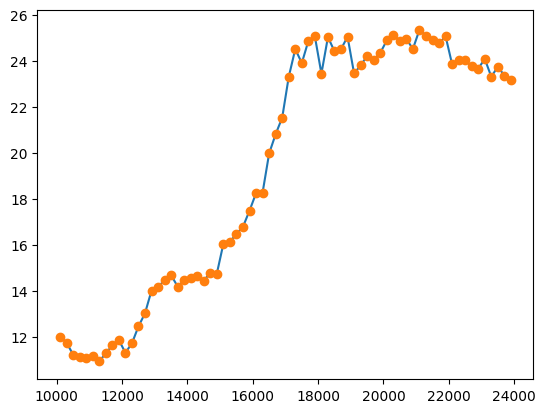

In [5]:
# plot the LGMR_sic_area
import matplotlib.pyplot as plt
plt.plot(LGMR_sic_area[:,0], LGMR_sic_area[:,1])
plt.errorbar(LGMR_sic_std[:,0], LGMR_sic_area[:,1], yerr=LGMR_sic_std[:,1], fmt='o')

# Load all data

In [2]:
import pandas as pd
import numpy as np
import xarray as xr

# load orbital parameters
path='D:/VScode/Last_deglaciation/data_fig3/'
df_ecc=pd.read_csv(path+'df_ecc.csv')
df_pre=pd.read_csv(path+'df_pre.csv')
df_obl=pd.read_csv(path+'df_obl.csv')

# Load summer insolation and intergrated summer insolation of 60°S
inso60s=pd.read_csv('D:/VScode/Last_deglaciation/data_fig3/inso60s.csv')
df_inter_ann=pd.read_csv('D:/VScode/Last_deglaciation/data_fig3/df_inter_ann.csv')



# Load the proxy sea ice data
df_proxy_sea_ice = pd.read_csv('data_fig3/Chadwick et al-2022_Stacks_PCA.csv')
df_proxy_seaice_pc = pd.read_csv('data_fig3/Chadwick et al-2022_Stacks_PCA_pc.csv')

# load the LGMR_sic_area using pickle
import pickle
with open('D:/VScode/Last_deglaciation/data_fig3/LGMR_sic_area.pickle', 'rb') as f:
    LGMR_sic_area = pickle.load(f)

# load the LGMR_sic_std using pickle
with open('D:/VScode/Last_deglaciation/data_fig3/LGMR_sic_std.pickle', 'rb') as f:
    LGMR_sic_std = pickle.load(f)

# open the 'LGMR_GMST_ens.nc' file
ds_sat = xr.open_dataset('data/LGMR_SAT_climo.nc')

path='D:/VScode/Last_deglaciation/data/LGMR_SIC_May2023.nc'
ds_seaice = xr.open_dataset(path)
ds_seaice = ds_seaice.where(ds_seaice.age>=11000, drop=True)




# sat of the 50 to 70°S
# read the weighted_avg_sat_mean
import pickle
with open('D:/VScode/Last_deglaciation/data_fig3/weighted_avg_sat_mean.pickle', 'rb') as f:
    weighted_avg_sat_mean = pickle.load(f)
    
# read the weighted_avg_sat_ens using pickle
import pickle
with open('D:/VScode/Last_deglaciation/data_fig3/weighted_avg_sat_ens.pickle', 'rb') as f:
    weighted_avg_sat_ens = pickle.load(f)


# sat of the class 0
import pickle
with open('ens_ana_data/all_weighted_avg_curves_checked.pkl', 'rb') as f:
    all_weighted_avg_curves = pickle.load(f)

weighted_avg_curves_k = [curves[0] for curves in all_weighted_avg_curves]

data_dir = 'D:/VScode/Last_deglaciation/climo_ana_data'
ds_sat = xr.open_dataset(data_dir + '/ds_GMM_climo_relabeled.nc')

time_of_class0=ds_sat['age'].values


# loop through each data in weighted_avg_curves_k and calculate the mean between index 35 to 54 (correpsonding to 18100 to 21000 BP)
for j in range(len(weighted_avg_curves_k)):
    data=weighted_avg_curves_k[j]
    data_18100_21000=np.mean(data[35:55])
    data=data-data_18100_21000
    weighted_avg_curves_k[j]=data


# load TraCE data
path='D:/VScode/Last_deglaciation/data_fig3/'
trace_age=np.load(path+'trace_age.npy')
sat_series_orb=np.load(path+'sat_series_orb.npy')
sat_series_ghg=np.load(path+'sat_series_ghg.npy')
sat_series_allforcing=np.load(path+'sat_series_allforcing.npy')
smoothed_sat_orb=np.load(path+'smoothed_sat_orb.npy')
smoothed_sat_ghg=np.load(path+'smoothed_sat_ghg.npy')
smoothed_sat_allforcing=np.load(path+'smoothed_sat_allforcing.npy')

# read the asice_trace_orb using pickle
import pickle
with open('D:/VScode/Last_deglaciation/data_fig3/asice_trace_orb.pickle', 'rb') as f:
    asice_trace_orb=pickle.load(f)

# read the asice_trace_allforcing using pickle
import pickle
with open('D:/VScode/Last_deglaciation/data_fig3/asice_trace_allforcing.pickle', 'rb') as f:
    asice_trace_allforcing=pickle.load(f)


path='D:/VScode/Last_deglaciation/EBM_data/'

# Load the EBM results
# read the df_full_orbital.csv
df_full_orbital_EBM=pd.read_csv(path+'df_full_orbital_EBM.csv')
# read the df_obl.csv
df_obl_EBM=pd.read_csv(path+'df_obl_EBM.csv')
# read the df_pre_EBM.csv
df_pre_EBM=pd.read_csv(path+'df_pre_EBM.csv')
# read the df_GHG_EBM.csv
df_all_forcing_EBM=pd.read_csv(path+'df_all_forcing_EBM.csv')


ebm_list=[df_all_forcing_EBM,df_full_orbital_EBM, df_obl_EBM, df_pre_EBM]



c:\Users\zps19\.conda\envs\pz-env\lib\site-packages\xarray\coding\variables.py:148: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
c:\Users\zps19\.conda\envs\pz-env\lib\site-packages\xarray\coding\variables.py:148: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv


In [1]:
import numpy as np

sad_PIPSO25 = np.array([
    [0.36, 0.173],
    [1.35, 0.250],
    [1.35, 0.241],
    [2.24, 0.355],
    [3.11, 0.358],
    [3.99, np.nan],
    [4.54, 0.000],
    [4.89, 0.000],
    [5.77, np.nan],
    [6.69, 0.396],
    [7.57, np.nan],
    [8.63, np.nan],
    [9.48, np.nan],
    [9.64, np.nan],
    [10.13, 0.187],
    [10.29, 0.000],
    [10.64, 0.240],
    [10.81, 0.176],
    [11.29, 0.000],
    [11.47, 0.000],
    [12.25, 0.000],
    [13.05, 0.104],
    [13.58, 0.000],
    [13.85, 0.082],
    [14.46, 0.143],
    [14.46, 0.204],
    [14.82, 0.000],
    [15.40, np.nan],
    [15.94, 0.000],
    [16.42, 0.000],
    [16.97, 0.216],
    [17.80, 0.357],
    [18.44, 0.311],
    [18.94, 0.327],
    [19.47, 0.450],
    [20.00, 0.517],
    [20.56, 0.459],
    [21.11, 0.900],
    [21.64, 0.675],
    [22.16, 0.782],
    [22.64, 0.827],
    [23.21, 0.911],
    [24.24, 0.544],
    [25.26, 0.854],
    [25.26, 0.816],
    [26.25, 0.866],
    [27.41, 1.000],
    [28.80, 1.000],
    [29.79, 0.699],
    [30.73, 0.643],
    [31.75, np.nan],
    [32.75, 0.663],
    [33.77, 0.565],
    [34.76, 0.661],
    [35.77, 0.607],
    [36.76, 0.611],
    [38.49, 1.000],
    [39.74, 0.873]
])
# remove rows with nan
sad_PIPSO25 = sad_PIPSO25[~np.isnan(sad_PIPSO25).any(axis=1)]

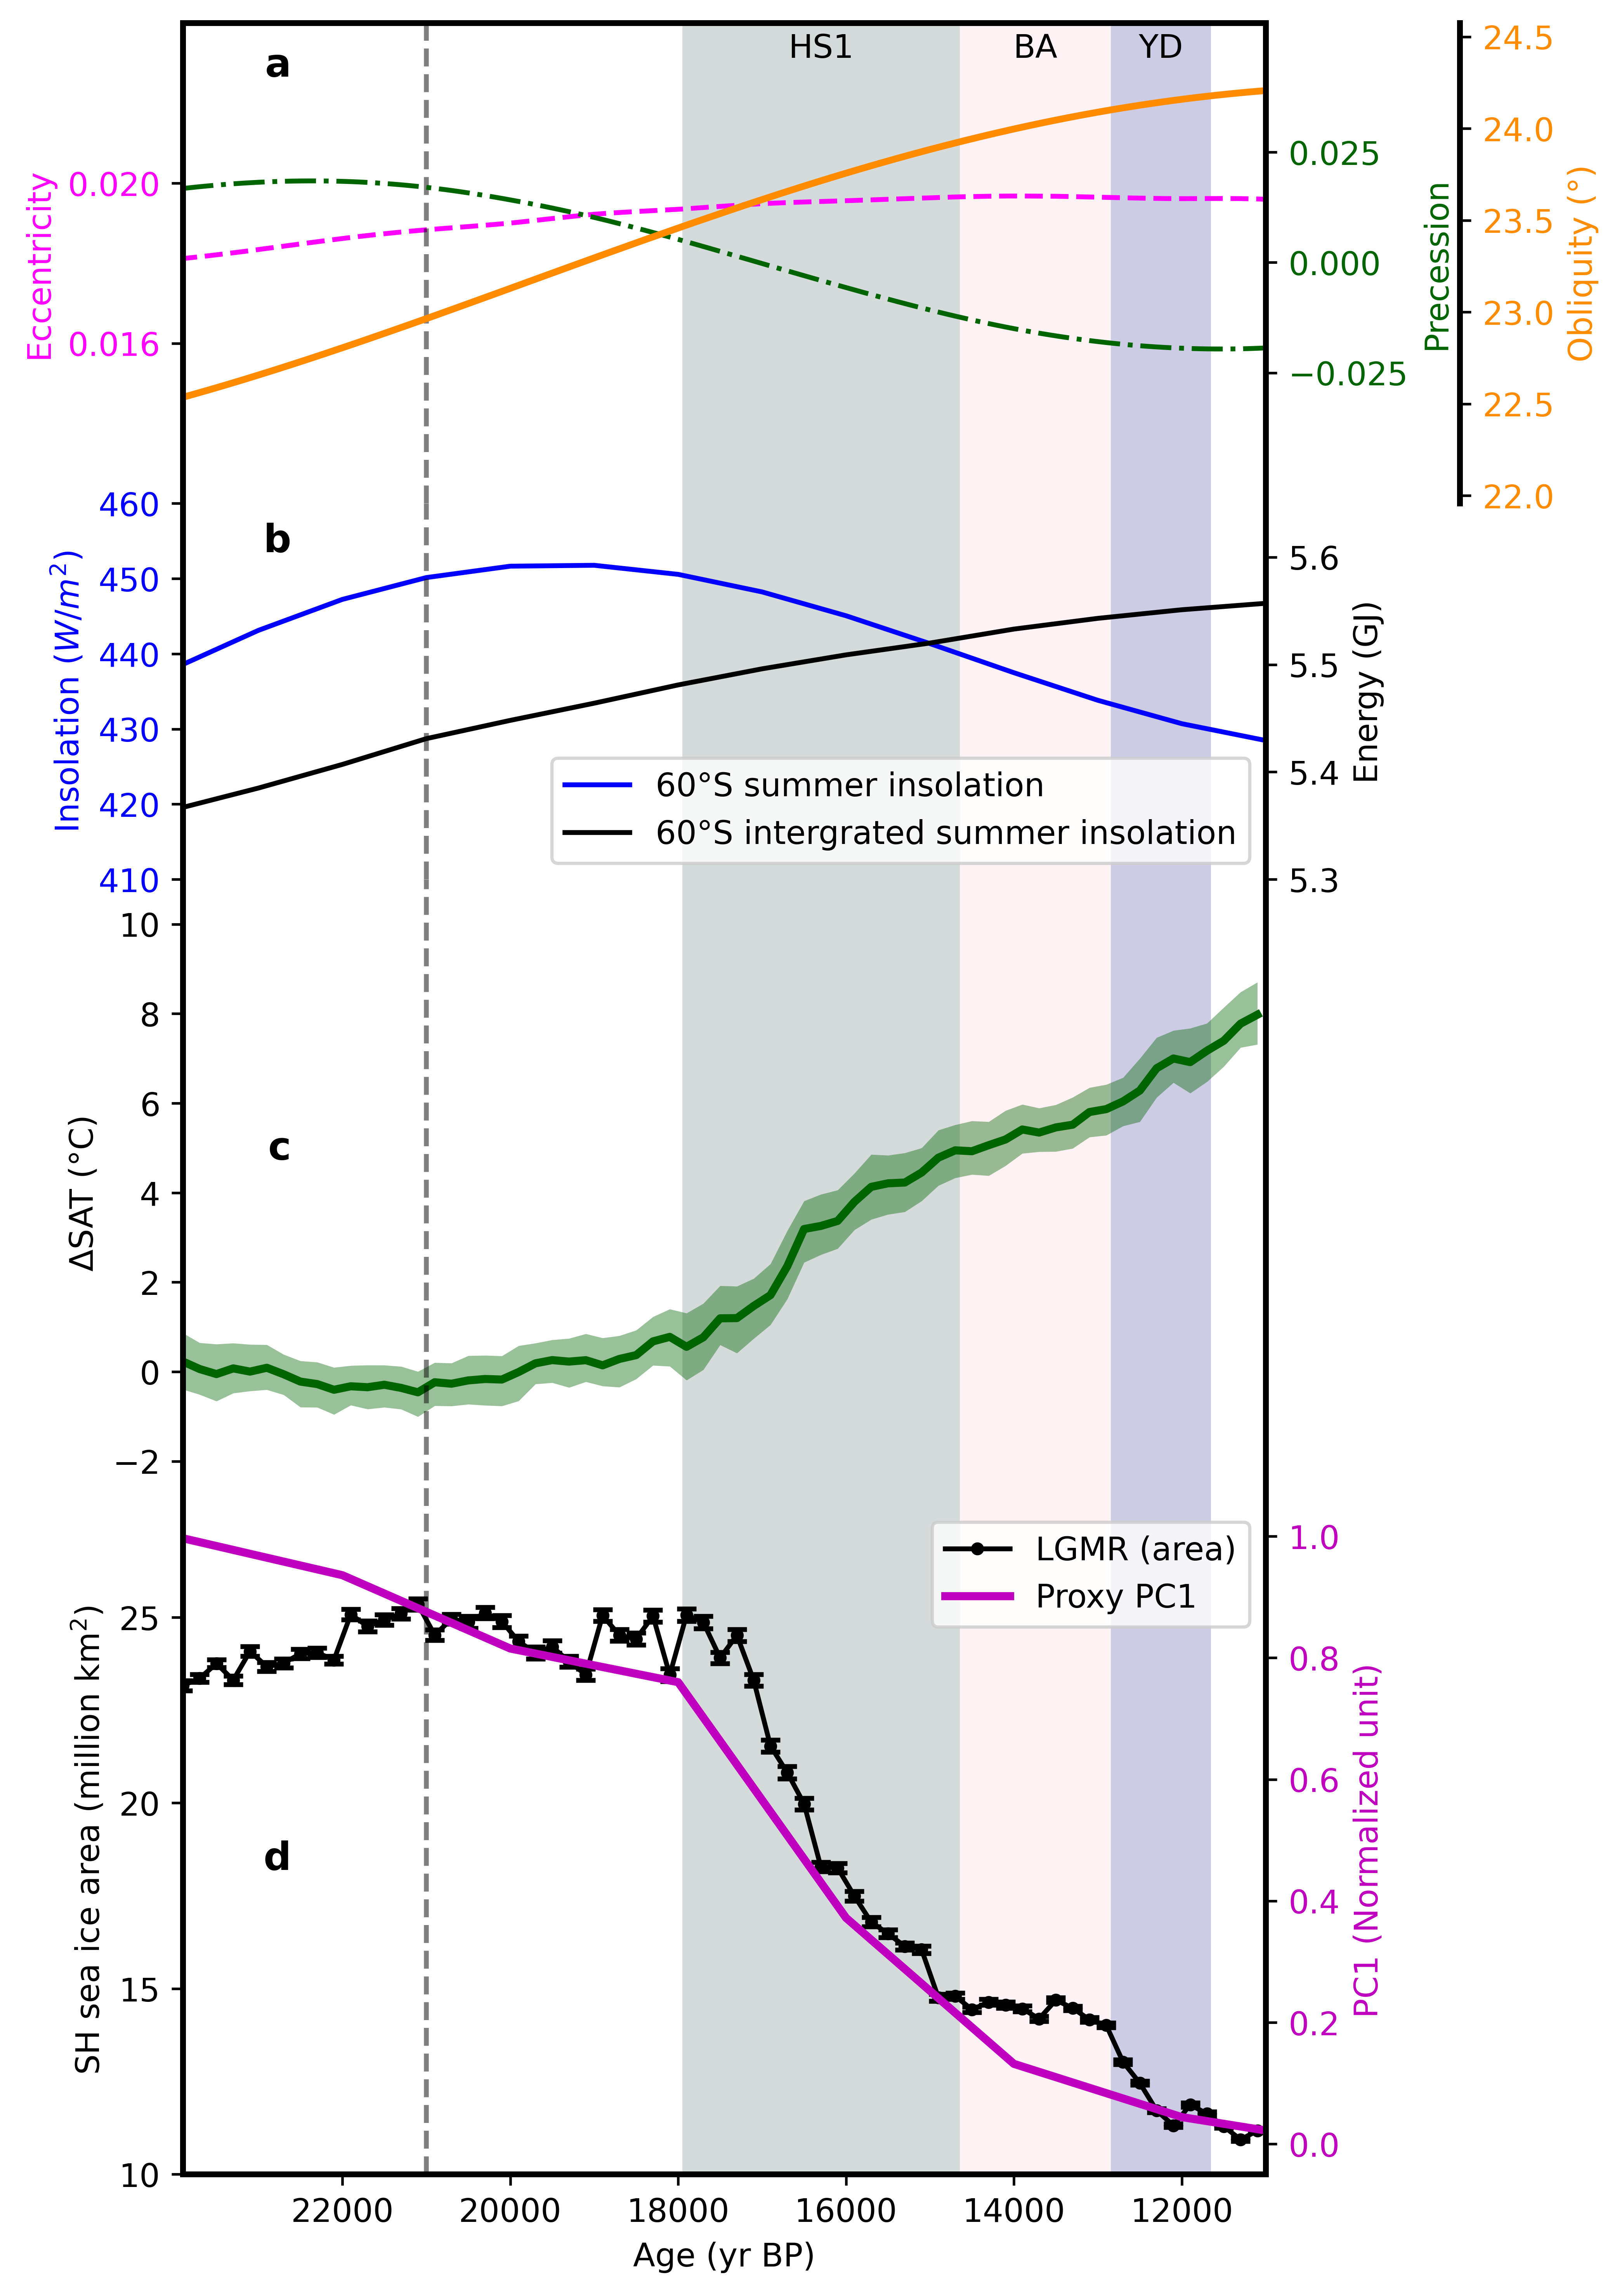

In [29]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as patches
import cartopy.crs as ccrs
from cartopy.mpl.geoaxes import GeoAxes
from scipy.stats import zscore



# Periods for the vertical grey bars
HS1 = np.array([18000, 14692]) - 50  # convert to b1950
BA = np.array([14692, 12896]) - 50
YD = np.array([12896, 11703]) - 50

# Define the grey color with a transparency using RGBA tuple
grey_color = (0.8, 0.8, 0.8, 0.5)  # Grey color with 50% transparency.

# Function to add grey bars to the subplots
def add_grey_bars(ax):

    ax.axvspan(HS1[1], HS1[0], color='darkslategray', alpha=0.2, lw=0,zorder=-1)
    ax.axvspan(BA[1], BA[0], color='pink', alpha=0.2, lw=0,zorder=-1)
    ax.axvspan(YD[1], YD[0], color='navy', alpha=0.2, lw=0,zorder=-1)


# sic_colors = {
#     '0-60': 'brown',      
#     '60-120': 'blue', 
#     '120-180': 'blueviolet', 
#     '180-240': 'green',  
#     '240-300': 'olive',   
#     '300-360': 'darkorange',    
# }

EBM_marker=['o','^','s']
EBM_label=['EBM, obliquity only','EBM, orbital','EBM, precession only']
EBM_line=['-','--',':']


# fig, axs = plt.subplots(4, 1, figsize=(6, 10), dpi=600,sharex=True)
fig, axs = plt.subplots(4, 1, figsize=(6, 12), dpi=600, sharex=True, 
                        gridspec_kw={'height_ratios': [2.3, 1.8, 3, 3.2]})


# First subplot for orbital parameters with three y-axes
ax0 = axs[0]

# Plot Eccentricity
ax0.plot(df_ecc['age'], df_ecc['ecc'], color='magenta', label='Eccentricity', linestyle='--')
ax0.set_ylabel('Eccentricity', color='magenta')
# set y axis limit
ax0.set_ylim(0.012, 0.024)
# set y ticks
ax0.set_yticks([0.016, 0.02])
ax0.tick_params(axis='y', labelcolor='magenta')
ax0.spines['bottom'].set_visible(False)

ax0.text(x=np.mean(HS1), y=0.99 * np.max(ax0.get_ylim()), s='HS1', ha='center', va='top')
ax0.text(x=np.mean(BA), y=0.99 * np.max(ax0.get_ylim()), s='BA', ha='center', va='top')
ax0.text(x=np.mean(YD), y=0.99 * np.max(ax0.get_ylim()), s='YD', ha='center', va='top')

# Create first twin axis for Precession
ax0_1 = ax0.twinx()
ax0_1.plot(df_pre['age'], df_pre['pre'], color='darkgreen', label='Precession', linestyle='-.')
ax0_1.set_ylabel('Precession', color='darkgreen')
ax0_1.tick_params(axis='y', labelcolor='darkgreen')
# set ytick label to be '-0.025', '0', and '0.025'
ax0_1.set_yticks([-0.025, 0, 0.025])
# show y axis and ticks on the right
ax0_1.yaxis.tick_right()
ax0_1.yaxis.set_label_position("right")
ax0_1.spines['bottom'].set_visible(False)

# Create second twin axis for Obliquity, positioned on the right
# plot obl data in dark blue
ax0_2 = ax0.twinx()
ax0_2.plot(df_obl['age'], df_obl['obl'].values*180/np.pi, color='darkorange', label='Obliquity',linewidth=2.1)
ax0_2.set_ylabel('Obliquity (°)', color='darkorange')
ax0_2.tick_params(axis='y', labelcolor='darkorange')
# set the line width of the y axis to 1.8
ax0_2.spines['right'].set_linewidth(1.8)

# Adjust the position of the second twin axis
ax0_2.spines['right'].set_position(('outward', 60))  # Offset the right spine of ax0_2
ax0_2.spines['bottom'].set_visible(False)









ax1 = axs[1]

# ax1.plot(inso60s['age'], inso60s['insolation'], color='blue', label='inso60s insolation')
ax1.plot(df_full_orbital_EBM['age'], df_full_orbital_EBM['60S summer inso (21 Dec to 21 Feb)'], color='blue',label='60°S summer insolation')
ax1.plot(0,0, color='k', label='60°S intergrated summer insolation')
# set y axis limit
ax1.set_ylim(410, 460)
ax1.set_ylabel('Insolation ($W/m^2$)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.legend(loc='lower right')

ax2 = ax1.twinx()
ax2.plot(df_inter_ann['age'], df_inter_ann['275'], color='k', label='df_inter_ann data')

# set y axis limit
ax2.set_ylim(5.3, 5.65)
ax2.set_ylabel('Energy (GJ)', color='k')
ax2.tick_params(axis='y', labelcolor='k')
# set x axis limit
ax1.set_xlim(23900,11000)

# remove box
ax1.spines['top'].set_visible(False)
ax1.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['bottom'].set_visible(False)
# remove xticks
# ax1.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)





# calculate the 5th, 25th, 75th and 95th percentile of the weighted_avg_curves_k
# weighted_avg_curves_k_5th=np.percentile(weighted_avg_curves_k,5,axis=0)
weighted_avg_curves_k_25th=np.percentile(weighted_avg_curves_k,25,axis=0)
weighted_avg_curves_k_75th=np.percentile(weighted_avg_curves_k,75,axis=0)
# weighted_avg_curves_k_95th=np.percentile(weighted_avg_curves_k,95,axis=0)

# calculate the median of the weighted_avg_curves_k
weighted_avg_curves_k_median=np.median(weighted_avg_curves_k,axis=0)
axs[2].fill_between(time_of_class0,weighted_avg_curves_k_25th,weighted_avg_curves_k_75th,color='darkgreen',alpha=0.4,linewidth=0)
axs[2].plot(time_of_class0, weighted_avg_curves_k_median, color='darkgreen',linewidth=2.5, label='LGMR Class 1')


# df_full_orbital_EBM_21=df_full_orbital_EBM['SAT (50 to 70S)'][df_full_orbital_EBM['age']==21000].values
# axs[2].plot(df_full_orbital_EBM['age'], df_full_orbital_EBM['SAT (50 to 70S)'].values-df_full_orbital_EBM_21, color='k',linestyle='-',marker='s',label='EBM, All forcing, 50 to 70°S')

# axs[2].legend(loc='upper left')
axs[2].set_ylabel('ΔSAT (°C)')
axs[2].set_xlim(23900,11000)
axs[2].set_ylim(-3, 11)
# axs[2].legend(loc='upper left')
# set y axis limit
# axs[1].set_ylim(-12, 3)
# remove boxes
axs[2].spines['top'].set_visible(False)
axs[2].spines['bottom'].set_visible(False)
axs[2].spines['right'].set_visible(False)
# remove xticks
axs[2].tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)






# Plot the sea ice area
#####################################################################################
# axs3=axs[3]
# axs3.plot(LGMR_sic_area[:,0], LGMR_sic_area[:,1], color='k', label='LGMR (area)', marker='o')
# axs3.plot(0,0,color='m', marker='x',markersize=10, linewidth=2.5,linestyle='--',label='Proxy PC1')

# axs3.set_ylim(10, 28)
# # set y tick labels
# axs3.set_yticks([10, 15, 20, 25])
# axs3.set_xlabel('Age (yr BP)')  # corrected from axs[3].xlabel
# axs3.set_ylabel('SH sea ice area (million km$^2$)')
# axs3.legend(loc='upper right')


# def min_max_scaling(array):
#     min_val = np.min(array)
#     max_val = np.max(array)
#     scaled_array = (array - min_val) / (max_val - min_val)
#     return scaled_array

# # get the df_proxy_seaice_pc data younger than 30 ka
# df_proxy_seaice_pc_younger=df_proxy_seaice_pc[df_proxy_seaice_pc['Age (ka)']<30]

# ax3_2 = axs3.twinx()

# ax3_2.plot(df_proxy_seaice_pc_younger['Age (ka)']*1000, min_max_scaling(df_proxy_seaice_pc_younger['PC 1'].values), color='m', marker='x',markersize=10, linewidth=2.5,linestyle='--',label='Proxy')
# ax3_2.set_ylabel('PC1 (Normalized unit)', color='m')
# ax3_2.tick_params(axis='y', labelcolor='m')
# ax3_2.spines['top'].set_visible(False)
# ax3_2.spines['bottom'].set_visible(False)

# # add a axis
# ax3_3 = axs3.twinx()
# ax3_3.spines['top'].set_visible(False)
# ax3_3.spines['bottom'].set_visible(False)
# ax3_3.plot(sad_PIPSO25[:,0]*1000, sad_PIPSO25[:,1], color='r', marker='x',markersize=10, linewidth=2.5,linestyle='--',label='PIP25')


# # remove boxes
# axs[3].spines['top'].set_visible(False)
# axs[3].spines['right'].set_visible(False)  
# axs[3].spines['bottom'].set_visible(False)
# axs[3].spines['left'].set_visible(False)

# # remove xticks
# axs[3].tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=True)
##############################################################################################

axs3 = axs[3]
axs3.plot(LGMR_sic_area[:,0], LGMR_sic_area[:,1], color='k', label='LGMR (area)', marker='o', markersize=3)
# plot the error bar of the LGMR_sic_std
axs3.errorbar(LGMR_sic_std[:,0], LGMR_sic_area[:,1], yerr=LGMR_sic_std[:,1], fmt='none', color='k', capsize=3, capthick=1.5)

axs3.plot(0, 0, color='m', marker='none', markersize=10, linewidth=2.5, linestyle='-', label='Proxy PC1')
# axs3.plot(0, 0, color='darkorange', marker='s', markersize=6, linewidth=1.5, linestyle='-', label='PIPSO$_{25}$')

axs3.set_ylim(10, 28)
axs3.set_yticks([10, 15, 20, 25])
axs3.set_xlabel('Age (yr BP)')
axs3.set_ylabel('SH sea ice area (million km$^2$)')
axs3.legend(loc='upper right')

def min_max_scaling(array):
    min_val = np.min(array)
    max_val = np.max(array)
    scaled_array = (array - min_val) / (max_val - min_val)
    return scaled_array

# Proxy data handling
df_proxy_seaice_pc_younger = df_proxy_seaice_pc[df_proxy_seaice_pc['Age (ka)'] < 30]

# Adding right y-axis for the first set of additional data
ax3_2 = axs3.twinx()
ax3_2.plot(df_proxy_seaice_pc_younger['Age (ka)']*1000, min_max_scaling(df_proxy_seaice_pc_younger['PC 1'].values), 
           color='m', marker='none', markersize=10, linewidth=2.5, linestyle='-', label='Proxy PC1 (Normalized)')
ax3_2.set_ylabel('PC1 (Normalized unit)', color='m')
ax3_2.tick_params(axis='y', labelcolor='m')
ax3_2.spines['top'].set_visible(False)

# # Adding second right y-axis for sad_PIPSO25 data
# ax3_3 = axs3.twinx()
# ax3_3.spines['top'].set_visible(False)
# # Shift the third axis to the right
# ax3_3.spines["right"].set_position(("axes", 1.2))
# ax3_3.plot(sad_PIPSO25[:,0]*1000, sad_PIPSO25[:,1], color='darkorange', marker='s', markersize=6, linewidth=1.5, linestyle='-', label='PIPSO$_{25}$')

# # plot error bar, the one side error (SD of the PIP25 data)  is 0.04
# ax3_3.errorbar(sad_PIPSO25[:,0]*1000, sad_PIPSO25[:,1], yerr=0.04, fmt='none', color='darkorange', capsize=5, capthick=1.5)

# ax3_3.set_ylabel('PC08\nPIPSO$_{25}$', color='darkorange')
# ax3_3.tick_params(axis='y', labelcolor='darkorange')
# ax3_3.spines['right'].set_linewidth(1.8)

axs3.spines['top'].set_visible(False)
axs3.spines['right'].set_visible(False)  
axs3.spines['bottom'].set_visible(False)
axs3.spines['left'].set_visible(False)
axs3.tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=True)

#######################################################################################################


# Label for subplots
axs[0].text(0.1, 0.95, 'a', transform=axs[0].transAxes, fontsize=12, fontweight='bold', va='top', ha='right')
axs[1].text(0.1, 0.95, 'b', transform=axs[1].transAxes, fontsize=12, fontweight='bold', va='top', ha='right')
axs[2].text(0.1, 0.6, 'c', transform=axs[2].transAxes, fontsize=12, fontweight='bold', va='top', ha='right')
axs[3].text(0.1, 0.5, 'd', transform=axs[3].transAxes, fontsize=12, fontweight='bold', va='top', ha='right')
# axs[4].text(0.1, 0.5, 'e', transform=axs[4].transAxes, fontsize=12, fontweight='bold', va='top', ha='right')


# Get the coordinates for the axes
top = axs[0].get_position().y1
bottom = axs[-1].get_position().y0
left = axs[0].get_position().x0  # Assuming the left y-axis is used
right = axs[0].get_position().x1  # Assuming the right y-axis is not extended

# Create a box that connects all y-axes and the top of the first subplot, and the bottom of the last subplot
# The coordinates are adjusted so that the left and right sides of the box align with the y-axis line
box = patches.FancyBboxPatch(
    (left, bottom), right-left, top-bottom,
    transform=fig.transFigure, boxstyle="square,pad=0", 
    ec="black", fc="none", lw=1.8, clip_on=False
)

# Add the box to the figure
fig.patches.extend([box])

for ax in axs:
    add_grey_bars(ax)
    ax.axvline(x=21000, color='k', linestyle='--', alpha=0.5)


# adjust vertical space between subplots
fig.subplots_adjust(hspace=0)



# Show plot
plt.show()





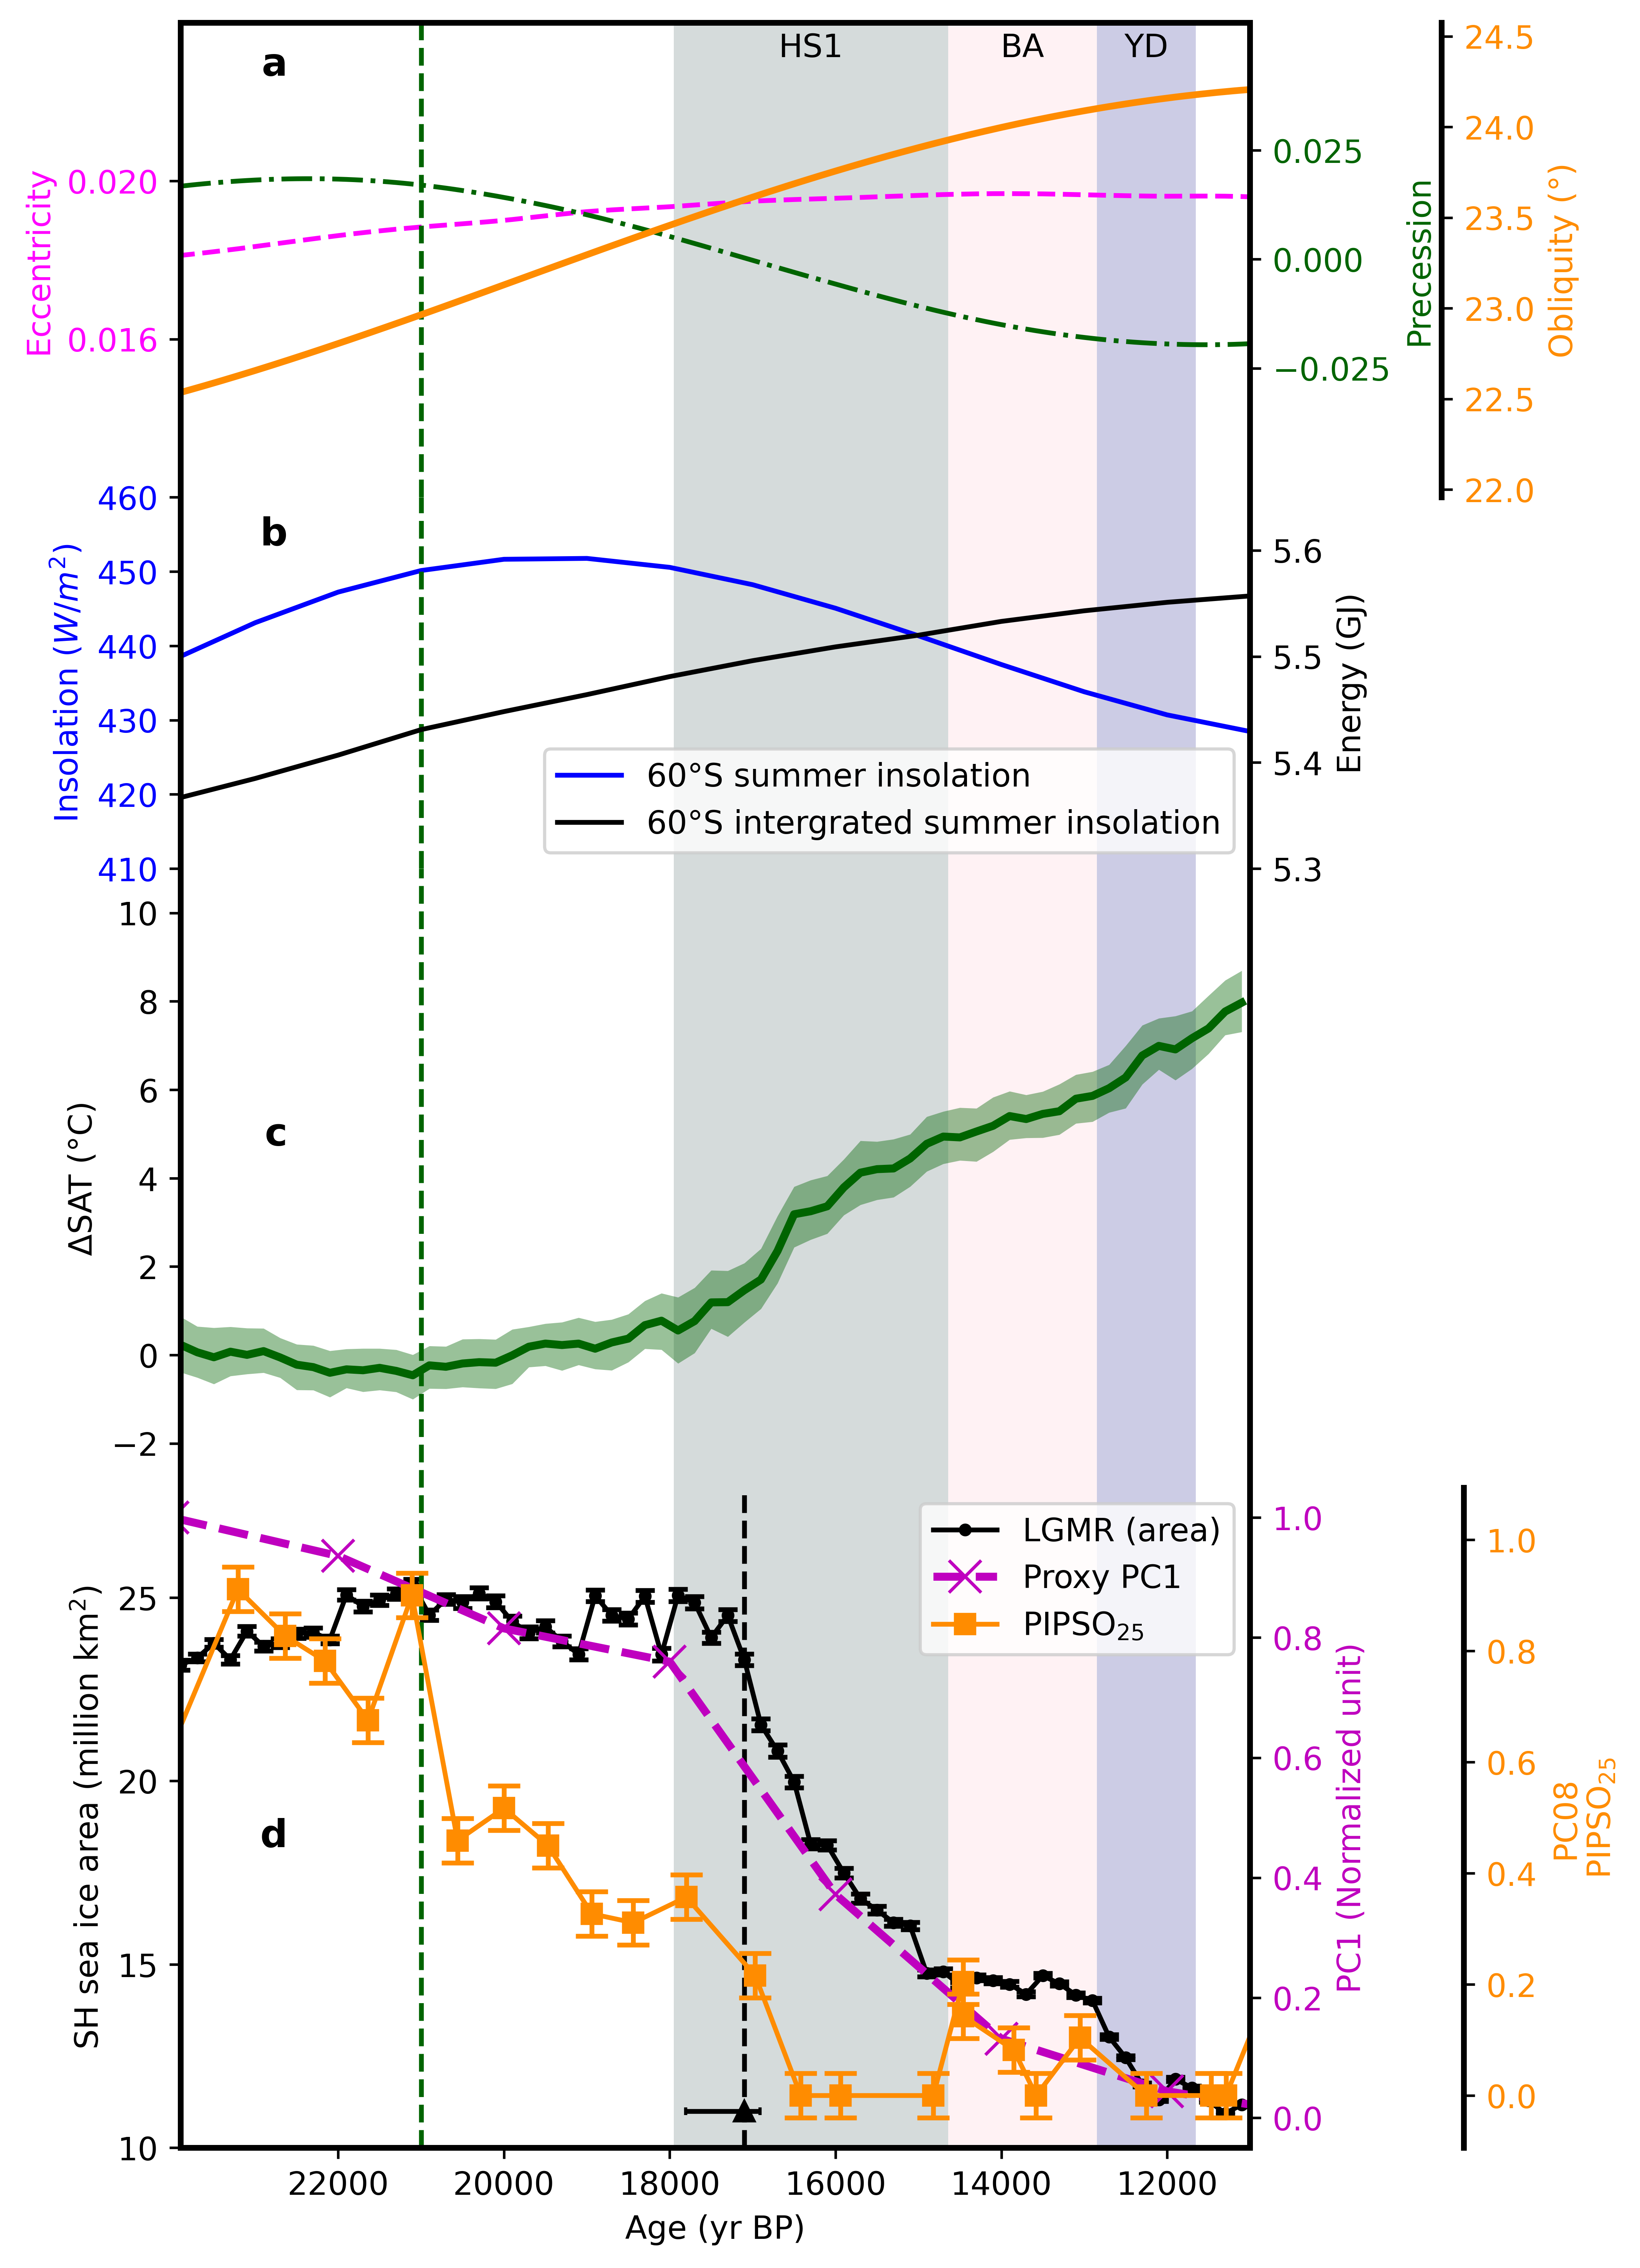

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as patches
import cartopy.crs as ccrs
from cartopy.mpl.geoaxes import GeoAxes
from scipy.stats import zscore



# Periods for the vertical grey bars
HS1 = np.array([18000, 14692]) - 50  # convert to b1950
BA = np.array([14692, 12896]) - 50
YD = np.array([12896, 11703]) - 50

# Define the grey color with a transparency using RGBA tuple
grey_color = (0.8, 0.8, 0.8, 0.5)  # Grey color with 50% transparency.

# Function to add grey bars to the subplots
def add_grey_bars(ax):

    ax.axvspan(HS1[1], HS1[0], color='darkslategray', alpha=0.2, lw=0,zorder=-1)
    ax.axvspan(BA[1], BA[0], color='pink', alpha=0.2, lw=0,zorder=-1)
    ax.axvspan(YD[1], YD[0], color='navy', alpha=0.2, lw=0,zorder=-1)


# sic_colors = {
#     '0-60': 'brown',      
#     '60-120': 'blue', 
#     '120-180': 'blueviolet', 
#     '180-240': 'green',  
#     '240-300': 'olive',   
#     '300-360': 'darkorange',    
# }

EBM_marker=['o','^','s']
EBM_label=['EBM, obliquity only','EBM, orbital','EBM, precession only']
EBM_line=['-','--',':']


# fig, axs = plt.subplots(4, 1, figsize=(6, 10), dpi=600,sharex=True)
fig, axs = plt.subplots(4, 1, figsize=(6, 12), dpi=600, sharex=True, 
                        gridspec_kw={'height_ratios': [2.3, 1.8, 3, 3.2]})


# First subplot for orbital parameters with three y-axes
ax0 = axs[0]

# Plot Eccentricity
ax0.plot(df_ecc['age'], df_ecc['ecc'], color='magenta', label='Eccentricity', linestyle='--')
ax0.set_ylabel('Eccentricity', color='magenta')
# set y axis limit
ax0.set_ylim(0.012, 0.024)
# set y ticks
ax0.set_yticks([0.016, 0.02])
ax0.tick_params(axis='y', labelcolor='magenta')
ax0.spines['bottom'].set_visible(False)

ax0.text(x=np.mean(HS1), y=0.99 * np.max(ax0.get_ylim()), s='HS1', ha='center', va='top')
ax0.text(x=np.mean(BA), y=0.99 * np.max(ax0.get_ylim()), s='BA', ha='center', va='top')
ax0.text(x=np.mean(YD), y=0.99 * np.max(ax0.get_ylim()), s='YD', ha='center', va='top')

# Create first twin axis for Precession
ax0_1 = ax0.twinx()
ax0_1.plot(df_pre['age'], df_pre['pre'], color='darkgreen', label='Precession', linestyle='-.')
ax0_1.set_ylabel('Precession', color='darkgreen')
ax0_1.tick_params(axis='y', labelcolor='darkgreen')
# set ytick label to be '-0.025', '0', and '0.025'
ax0_1.set_yticks([-0.025, 0, 0.025])
# show y axis and ticks on the right
ax0_1.yaxis.tick_right()
ax0_1.yaxis.set_label_position("right")
ax0_1.spines['bottom'].set_visible(False)

# Create second twin axis for Obliquity, positioned on the right
# plot obl data in dark blue
ax0_2 = ax0.twinx()
ax0_2.plot(df_obl['age'], df_obl['obl'].values*180/np.pi, color='darkorange', label='Obliquity',linewidth=2.1)
ax0_2.set_ylabel('Obliquity (°)', color='darkorange')
ax0_2.tick_params(axis='y', labelcolor='darkorange')
# set the line width of the y axis to 1.8
ax0_2.spines['right'].set_linewidth(1.8)

# Adjust the position of the second twin axis
ax0_2.spines['right'].set_position(('outward', 60))  # Offset the right spine of ax0_2
ax0_2.spines['bottom'].set_visible(False)









ax1 = axs[1]

# ax1.plot(inso60s['age'], inso60s['insolation'], color='blue', label='inso60s insolation')
ax1.plot(df_full_orbital_EBM['age'], df_full_orbital_EBM['60S summer inso (21 Dec to 21 Feb)'], color='blue',label='60°S summer insolation')
ax1.plot(0,0, color='k', label='60°S intergrated summer insolation')
# set y axis limit
ax1.set_ylim(410, 460)
ax1.set_ylabel('Insolation ($W/m^2$)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.legend(loc='lower right')

ax2 = ax1.twinx()
ax2.plot(df_inter_ann['age'], df_inter_ann['275'], color='k', label='df_inter_ann data')

# set y axis limit
ax2.set_ylim(5.3, 5.65)
ax2.set_ylabel('Energy (GJ)', color='k')
ax2.tick_params(axis='y', labelcolor='k')
# set x axis limit
ax1.set_xlim(23900,11000)

# remove box
ax1.spines['top'].set_visible(False)
ax1.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['bottom'].set_visible(False)
# remove xticks
# ax1.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)





# calculate the 5th, 25th, 75th and 95th percentile of the weighted_avg_curves_k
# weighted_avg_curves_k_5th=np.percentile(weighted_avg_curves_k,5,axis=0)
weighted_avg_curves_k_25th=np.percentile(weighted_avg_curves_k,25,axis=0)
weighted_avg_curves_k_75th=np.percentile(weighted_avg_curves_k,75,axis=0)
# weighted_avg_curves_k_95th=np.percentile(weighted_avg_curves_k,95,axis=0)

# calculate the median of the weighted_avg_curves_k
weighted_avg_curves_k_median=np.median(weighted_avg_curves_k,axis=0)
axs[2].fill_between(time_of_class0,weighted_avg_curves_k_25th,weighted_avg_curves_k_75th,color='darkgreen',alpha=0.4,linewidth=0)
axs[2].plot(time_of_class0, weighted_avg_curves_k_median, color='darkgreen',linewidth=2.5, label='LGMR Class 1')


# df_full_orbital_EBM_21=df_full_orbital_EBM['SAT (50 to 70S)'][df_full_orbital_EBM['age']==21000].values
# axs[2].plot(df_full_orbital_EBM['age'], df_full_orbital_EBM['SAT (50 to 70S)'].values-df_full_orbital_EBM_21, color='k',linestyle='-',marker='s',label='EBM, All forcing, 50 to 70°S')

# axs[2].legend(loc='upper left')
axs[2].set_ylabel('ΔSAT (°C)')
axs[2].set_xlim(23900,11000)
axs[2].set_ylim(-3, 11)
# axs[2].legend(loc='upper left')
# set y axis limit
# axs[1].set_ylim(-12, 3)
# remove boxes
axs[2].spines['top'].set_visible(False)
axs[2].spines['bottom'].set_visible(False)
axs[2].spines['right'].set_visible(False)
# remove xticks
axs[2].tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)






# Plot the sea ice area
#####################################################################################
# axs3=axs[3]
# axs3.plot(LGMR_sic_area[:,0], LGMR_sic_area[:,1], color='k', label='LGMR (area)', marker='o')
# axs3.plot(0,0,color='m', marker='x',markersize=10, linewidth=2.5,linestyle='--',label='Proxy PC1')

# axs3.set_ylim(10, 28)
# # set y tick labels
# axs3.set_yticks([10, 15, 20, 25])
# axs3.set_xlabel('Age (yr BP)')  # corrected from axs[3].xlabel
# axs3.set_ylabel('SH sea ice area (million km$^2$)')
# axs3.legend(loc='upper right')


# def min_max_scaling(array):
#     min_val = np.min(array)
#     max_val = np.max(array)
#     scaled_array = (array - min_val) / (max_val - min_val)
#     return scaled_array

# # get the df_proxy_seaice_pc data younger than 30 ka
# df_proxy_seaice_pc_younger=df_proxy_seaice_pc[df_proxy_seaice_pc['Age (ka)']<30]

# ax3_2 = axs3.twinx()

# ax3_2.plot(df_proxy_seaice_pc_younger['Age (ka)']*1000, min_max_scaling(df_proxy_seaice_pc_younger['PC 1'].values), color='m', marker='x',markersize=10, linewidth=2.5,linestyle='--',label='Proxy')
# ax3_2.set_ylabel('PC1 (Normalized unit)', color='m')
# ax3_2.tick_params(axis='y', labelcolor='m')
# ax3_2.spines['top'].set_visible(False)
# ax3_2.spines['bottom'].set_visible(False)

# # add a axis
# ax3_3 = axs3.twinx()
# ax3_3.spines['top'].set_visible(False)
# ax3_3.spines['bottom'].set_visible(False)
# ax3_3.plot(sad_PIPSO25[:,0]*1000, sad_PIPSO25[:,1], color='r', marker='x',markersize=10, linewidth=2.5,linestyle='--',label='PIP25')


# # remove boxes
# axs[3].spines['top'].set_visible(False)
# axs[3].spines['right'].set_visible(False)  
# axs[3].spines['bottom'].set_visible(False)
# axs[3].spines['left'].set_visible(False)

# # remove xticks
# axs[3].tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=True)
##############################################################################################

axs3 = axs[3]
# axs3.plot(LGMR_sic_area[:,0], LGMR_sic_area[:,1], color='k', label='LGMR (area)', marker='o')
axs3.plot(LGMR_sic_area[:,0], LGMR_sic_area[:,1], color='k', label='LGMR (area)', marker='o', markersize=3)
axs3.errorbar(LGMR_sic_std[:,0], LGMR_sic_area[:,1], yerr=LGMR_sic_std[:,1], fmt='none', color='k', capsize=3, capthick=1.5)
axs3.plot(0, 0, color='m', marker='x', markersize=10, linewidth=2.5, linestyle='--', label='Proxy PC1')
axs3.plot(0, 0, color='darkorange', marker='s', markersize=6, linewidth=1.5, linestyle='-', label='PIPSO$_{25}$')

seaice_cp_age = {'lgmr': 17100}
seaice_cp_age_CI = {'lgmr': [16909.602, 17809.064]}

# plot a vertical line for the CP age
axs3.axvline(x=seaice_cp_age['lgmr'], color='k', linestyle='--', alpha=1)
# plot a vertical span for the CP age CI
# axs3.axvspan(seaice_cp_age_CI['lgmr'][0], seaice_cp_age_CI['lgmr'][1], color='k', alpha=0.2, lw=0, zorder=-1)
axs3.errorbar(seaice_cp_age['lgmr'], 11, xerr=[[abs(seaice_cp_age_CI['lgmr'][0]-seaice_cp_age['lgmr'])], [abs(seaice_cp_age['lgmr']-seaice_cp_age_CI['lgmr'][1])]], fmt='^', color='k', ecolor='k',capsize=1.2)



axs3.set_ylim(10, 28)
axs3.set_yticks([10, 15, 20, 25])
axs3.set_xlabel('Age (yr BP)')
axs3.set_ylabel('SH sea ice area (million km$^2$)')
axs3.legend(loc='upper right')

def min_max_scaling(array):
    min_val = np.min(array)
    max_val = np.max(array)
    scaled_array = (array - min_val) / (max_val - min_val)
    return scaled_array

# Proxy data handling
df_proxy_seaice_pc_younger = df_proxy_seaice_pc[df_proxy_seaice_pc['Age (ka)'] < 30]

# Adding right y-axis for the first set of additional data
ax3_2 = axs3.twinx()
ax3_2.plot(df_proxy_seaice_pc_younger['Age (ka)']*1000, min_max_scaling(df_proxy_seaice_pc_younger['PC 1'].values), 
           color='m', marker='x', markersize=10, linewidth=2.5, linestyle='--', label='Proxy PC1 (Normalized)')
ax3_2.set_ylabel('PC1 (Normalized unit)', color='m')
ax3_2.tick_params(axis='y', labelcolor='m')
ax3_2.spines['top'].set_visible(False)

# Adding second right y-axis for sad_PIPSO25 data
ax3_3 = axs3.twinx()
ax3_3.spines['top'].set_visible(False)
# Shift the third axis to the right
ax3_3.spines["right"].set_position(("axes", 1.2))
ax3_3.plot(sad_PIPSO25[:,0]*1000, sad_PIPSO25[:,1], color='darkorange', marker='s', markersize=6, linewidth=1.5, linestyle='-', label='PIPSO$_{25}$')

# plot error bar, the one side error (SD of the PIP25 data)  is 0.04
ax3_3.errorbar(sad_PIPSO25[:,0]*1000, sad_PIPSO25[:,1], yerr=0.04, fmt='none', color='darkorange', capsize=5, capthick=1.5)

ax3_3.set_ylabel('PC08\nPIPSO$_{25}$', color='darkorange')
ax3_3.tick_params(axis='y', labelcolor='darkorange')
ax3_3.spines['right'].set_linewidth(1.8)

axs3.spines['top'].set_visible(False)
axs3.spines['right'].set_visible(False)  
axs3.spines['bottom'].set_visible(False)
axs3.spines['left'].set_visible(False)
axs3.tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=True)

#######################################################################################################


# Label for subplots
axs[0].text(0.1, 0.95, 'a', transform=axs[0].transAxes, fontsize=12, fontweight='bold', va='top', ha='right')
axs[1].text(0.1, 0.95, 'b', transform=axs[1].transAxes, fontsize=12, fontweight='bold', va='top', ha='right')
axs[2].text(0.1, 0.6, 'c', transform=axs[2].transAxes, fontsize=12, fontweight='bold', va='top', ha='right')
axs[3].text(0.1, 0.5, 'd', transform=axs[3].transAxes, fontsize=12, fontweight='bold', va='top', ha='right')
# axs[4].text(0.1, 0.5, 'e', transform=axs[4].transAxes, fontsize=12, fontweight='bold', va='top', ha='right')


# Get the coordinates for the axes
top = axs[0].get_position().y1
bottom = axs[-1].get_position().y0
left = axs[0].get_position().x0  # Assuming the left y-axis is used
right = axs[0].get_position().x1  # Assuming the right y-axis is not extended

# Create a box that connects all y-axes and the top of the first subplot, and the bottom of the last subplot
# The coordinates are adjusted so that the left and right sides of the box align with the y-axis line
box = patches.FancyBboxPatch(
    (left, bottom), right-left, top-bottom,
    transform=fig.transFigure, boxstyle="square,pad=0", 
    ec="black", fc="none", lw=1.8, clip_on=False
)

# Add the box to the figure
fig.patches.extend([box])

for ax in axs:
    add_grey_bars(ax)
    ax.axvline(x=21000, color='darkgreen', linestyle='--', alpha=1)


# adjust vertical space between subplots
fig.subplots_adjust(hspace=0)



# Show plot
plt.show()





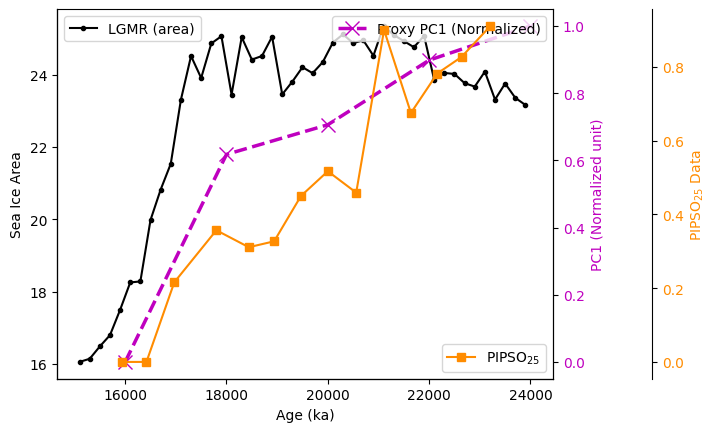

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Utility function for normalization
def min_max_scaling(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))



# Cropping data based on age constraints
cropped_LGMR_sic_area = LGMR_sic_area[(LGMR_sic_area[:, 0] >= 15000) & (LGMR_sic_area[:, 0] <= 24000)]
cropped_df_proxy_seaice_pc = df_proxy_seaice_pc[(df_proxy_seaice_pc['Age (ka)'] >= 15) & (df_proxy_seaice_pc['Age (ka)'] <= 24)]
cropped_sad_PIPSO25 = sad_PIPSO25[(sad_PIPSO25[:, 0] >= 15) & (sad_PIPSO25[:, 0] <= 24)]

# Initialize figure and axes
fig, axs3 = plt.subplots()

# Plotting cropped LGMR sea ice area
axs3.plot(cropped_LGMR_sic_area[:,0], cropped_LGMR_sic_area[:,1], color='k', label='LGMR (area)', marker='o', markersize=3)
axs3.set_ylabel('Sea Ice Area')
axs3.set_xlabel('Age (ka)')
axs3.legend(loc='upper left')

# Adding right y-axis for the first set of additional data
ax3_2 = axs3.twinx()
ax3_2.plot(cropped_df_proxy_seaice_pc['Age (ka)']*1000, min_max_scaling(cropped_df_proxy_seaice_pc['PC 1'].values),
           color='m', marker='x', markersize=10, linewidth=2.5, linestyle='--', label='Proxy PC1 (Normalized)')
ax3_2.set_ylabel('PC1 (Normalized unit)', color='m')
ax3_2.tick_params(axis='y', labelcolor='m')
ax3_2.spines['top'].set_visible(False)
ax3_2.legend(loc='upper right')

# Adding second right y-axis for sad_PIPSO25 data
ax3_3 = axs3.twinx()
ax3_3.spines['top'].set_visible(False)
# Shift the third axis to the right
ax3_3.spines["right"].set_position(("axes", 1.2))
ax3_3.plot(cropped_sad_PIPSO25[:,0]*1000, cropped_sad_PIPSO25[:,1], color='darkorange', marker='s', markersize=6, linewidth=1.5, linestyle='-', label='PIPSO$_{25}$')
ax3_3.set_ylabel('PIPSO$_{25}$ Data', color='darkorange')
ax3_3.tick_params(axis='y', labelcolor='darkorange')
ax3_3.legend(loc='lower right')

plt.show()


\Progress:100.0% done[==============================================================]
cps: [10. 35. 25.  6.]
cp_age: [17100. 22100. 20100. 16300.]
cp_age_CI: [[15740.342 16688.703 16300.   ]
 [16909.332 17860.934 17100.   ]
 [19177.777 21110.273 20100.   ]
 [21173.404 22881.766 22100.   ]
 [      nan       nan       nan]
 [      nan       nan       nan]
 [      nan       nan       nan]
 [      nan       nan       nan]
 [      nan       nan       nan]
 [      nan       nan       nan]]


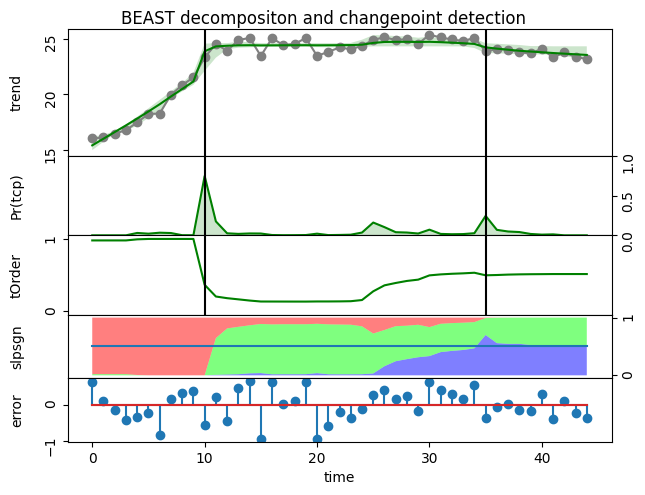

In [5]:
import numpy as np
import Rbeast as rb
import matplotlib.pyplot as plt

cropped_LGMR_sic_area


o = rb.beast(cropped_LGMR_sic_area[:,1], start=0, season='none', options=0, quiet=1)

rb.plot(o)

cps = o.trend.cp

# sort the cpCI according to the cps
cpCI=o.trend.cpCI
cpCI_cps_stack=np.column_stack((cpCI,cps))
# sort the cpCI_cps_stack according to the last column in asending order
cpCI_cps_stack_sorted=cpCI_cps_stack[cpCI_cps_stack[:,1].argsort()]


# remove nan
cps = cps[~np.isnan(cps)]
# sort the cps
# cps = np.sort(cps)

print('cps:', cps)
cp_age=cps*200+cropped_LGMR_sic_area[:,0][0]
cp_age_CI=cpCI_cps_stack_sorted*200+cropped_LGMR_sic_area[:,0][0]

seaice_cp_age = {'lgmr': 17100}
seaice_cp_age_CI = {'lgmr': [16909.602, 17809.064]}

print('cp_age:', cp_age)
print('cp_age_CI:', cp_age_CI)

In [60]:
df_proxy_seaice_pc

# plot column 0 and column 1 as interactive plot using plotly
import plotly.express as px
fig = px.line(df_proxy_seaice_pc, x='Age (ka)', y='PC 1')
fig.show()
# plt.plot(df_proxy_seaice_pc['Age (ka)'], df_proxy_seaice_pc['PC 1'], color='m', marker='x', markersize=10, linewidth=2.5, linestyle='--', label='Proxy PC1')

\Progress:100.0% done[==============================================================]
cps: []
cp_age: []
cp_age_CI: [[ 849.8639 2106.0576 1815.94  ]
 [      nan       nan       nan]]


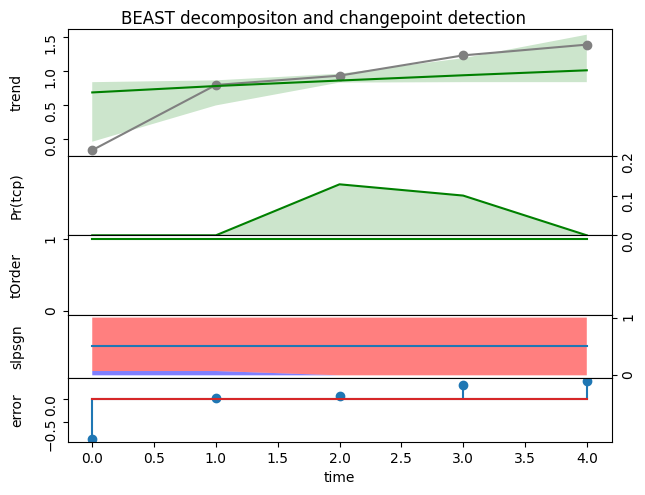

In [68]:
import numpy as np
import Rbeast as rb
import matplotlib.pyplot as plt


cropped_df_proxy_seaice_pc = df_proxy_seaice_pc[(df_proxy_seaice_pc['Age (ka)'] >= 15) & (df_proxy_seaice_pc['Age (ka)'] <= 24)]
cropped_df_proxy_seaice_pc_np=cropped_df_proxy_seaice_pc.values
cropped_df_proxy_seaice_pc_np[:,0]=cropped_df_proxy_seaice_pc_np[:,0]*1000

o = rb.beast(cropped_df_proxy_seaice_pc_np[:,1], start=0, season='none', options=0, quiet=1)

rb.plot(o)

cps = o.trend.cp

# sort the cpCI according to the cps
cpCI=o.trend.cpCI
# cpCI_cps_stack=np.column_stack((cpCI,cps))
# # sort the cpCI_cps_stack according to the last column in asending order
# cpCI_cps_stack_sorted=cpCI_cps_stack[cpCI_cps_stack[:,1].argsort()]


# remove nan
cps = cps[~np.isnan(cps)]
# sort the cps
cps = np.sort(cps)

print('cps:', cps)
cp_age=cps*2000+cropped_df_proxy_seaice_pc_np[:,0][0]
# cp_age_CI=cpCI_cps_stack_sorted*2000+cropped_df_proxy_seaice_pc_np[:,0][0]

# seaice_cp_age = {'lgmr': 17100}
# seaice_cp_age_CI = {'lgmr': [16909.525,17798.348]}

print('cp_age:', cp_age)
print('cp_age_CI:', cp_age_CI)

In [66]:
cropped_sad_PIPSO25

array([[15.94 ,  0.   ],
       [16.42 ,  0.   ],
       [16.97 ,  0.216],
       [17.8  ,  0.357],
       [18.44 ,  0.311],
       [18.94 ,  0.327],
       [19.47 ,  0.45 ],
       [20.   ,  0.517],
       [20.56 ,  0.459],
       [21.11 ,  0.9  ],
       [21.64 ,  0.675],
       [22.16 ,  0.782],
       [22.64 ,  0.827],
       [23.21 ,  0.911]])

-Progress:100.0% done[==============================================================]
cps: [9.]
cp_age: [1815.94]
cp_age_CI: [[ 849.8639 2106.0576 1815.94  ]
 [      nan       nan       nan]]


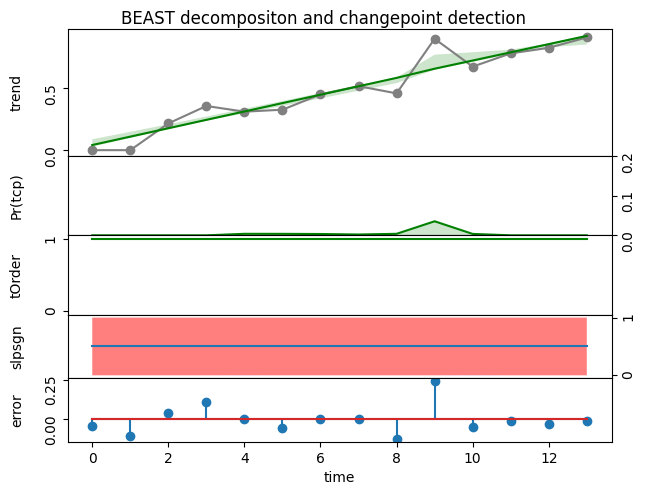

In [67]:
import numpy as np
import Rbeast as rb
import matplotlib.pyplot as plt

# cropped_LGMR_sic_area


o = rb.beast(cropped_sad_PIPSO25[:,1], start=0, season='none', options=0, quiet=1)

rb.plot(o)

cps = o.trend.cp

# sort the cpCI according to the cps
cpCI=o.trend.cpCI
cpCI_cps_stack=np.column_stack((cpCI,cps))
# sort the cpCI_cps_stack according to the last column in asending order
cpCI_cps_stack_sorted=cpCI_cps_stack[cpCI_cps_stack[:,1].argsort()]


# remove nan
cps = cps[~np.isnan(cps)]
# sort the cps
cps = np.sort(cps)

print('cps:', cps)
cp_age=cps*200+cropped_sad_PIPSO25[:,0][0]
cp_age_CI=cpCI_cps_stack_sorted*200+cropped_sad_PIPSO25[:,0][0]

seaice_cp_age = {'lgmr': 17100}
seaice_cp_age_CI = {'lgmr': [16909.525,17798.348]}

print('cp_age:', cp_age)
print('cp_age_CI:', cp_age_CI)

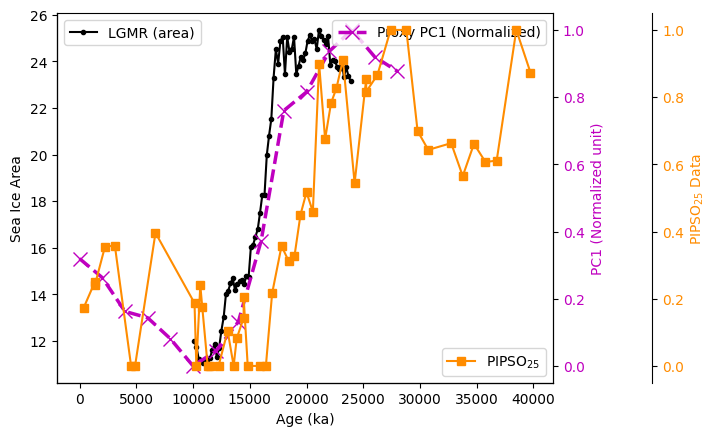

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



# Utility function for normalization
def min_max_scaling(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))

# Initialize figure and axes
fig, axs3 = plt.subplots()

# Plotting LGMR sea ice area
axs3.plot(LGMR_sic_area[:,0], LGMR_sic_area[:,1], color='k', label='LGMR (area)', marker='o', markersize=3)
axs3.set_ylabel('Sea Ice Area')
axs3.set_xlabel('Age (ka)')
axs3.legend(loc='upper left')

# Handling proxy data
df_proxy_seaice_pc_younger = df_proxy_seaice_pc[df_proxy_seaice_pc['Age (ka)'] < 30]

# Adding right y-axis for the first set of additional data
ax3_2 = axs3.twinx()
ax3_2.plot(df_proxy_seaice_pc_younger['Age (ka)']*1000, min_max_scaling(df_proxy_seaice_pc_younger['PC 1'].values),
           color='m', marker='x', markersize=10, linewidth=2.5, linestyle='--', label='Proxy PC1 (Normalized)')
ax3_2.set_ylabel('PC1 (Normalized unit)', color='m')
ax3_2.tick_params(axis='y', labelcolor='m')
ax3_2.spines['top'].set_visible(False)
ax3_2.legend(loc='upper right')

# Adding second right y-axis for sad_PIPSO25 data
ax3_3 = axs3.twinx()
ax3_3.spines['top'].set_visible(False)
# Shift the third axis to the right
ax3_3.spines["right"].set_position(("axes", 1.2))
ax3_3.plot(sad_PIPSO25[:,0]*1000, sad_PIPSO25[:,1], color='darkorange', marker='s', markersize=6, linewidth=1.5, linestyle='-', label='PIPSO$_{25}$')
ax3_3.set_ylabel('PIPSO$_{25}$ Data', color='darkorange')
ax3_3.tick_params(axis='y', labelcolor='darkorange')
ax3_3.legend(loc='lower right')

plt.show()
